In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [62]:
import plotly.express as px
import plotly.graph_objects as go

In [63]:
train = pd.read_csv("train.csv")

In [106]:
test = pd.read_csv("test.csv")

In [64]:
#train 데이터의 속성 및 결측치 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [65]:
train[:2]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [66]:
train.isnull().sum() #결측치 없음 

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [67]:
#test data도 확인
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


- casual + registered = count 이며, 위 속성은 train 데이터에만 있음 

In [68]:
#datetime의 값을 분해하여 따로 column으로 만들어보자
train['datetime'] = pd.to_datetime(train['datetime'])

In [107]:
test['datetime'] = pd.to_datetime(test['datetime'])

In [69]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [70]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


In [71]:
#year, month, ... 컬럼을 만들어서 저장
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['dayofweek'] = train['datetime'].dt.dayofweek

In [108]:
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['dayofweek'] = test['datetime'].dt.dayofweek

### 특성별 데이터 확인

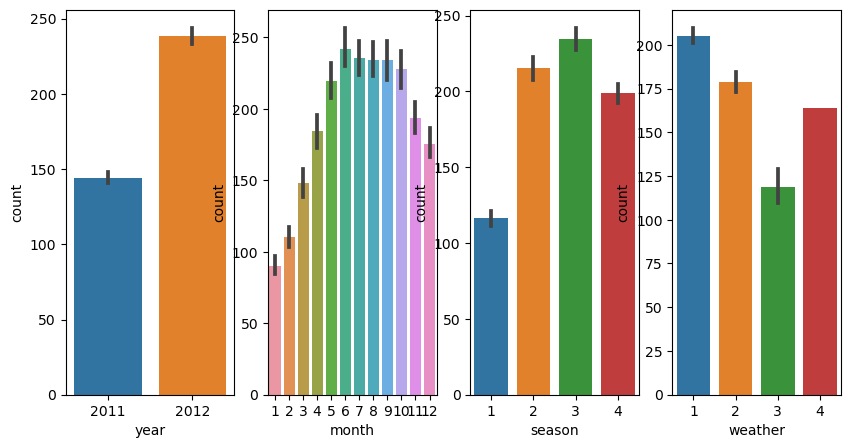

In [72]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize = (10, 5))

sns.barplot(data = train, x = 'year', y = 'count', ax = ax1)
sns.barplot(data = train, x = 'month', y = 'count', ax = ax2)
sns.barplot(data = train, x = 'season', y = 'count', ax = ax3)
sns.barplot(data = train, x = 'weather', y = 'count', ax = ax4)
plt.show()

In [73]:
sns.barplot(data = train, x = 'season', y = 'count', ax = ax1)

<AxesSubplot:xlabel='season', ylabel='count'>

In [74]:
train[train['season'] == 1].month.unique()

array([1, 2, 3], dtype=int64)

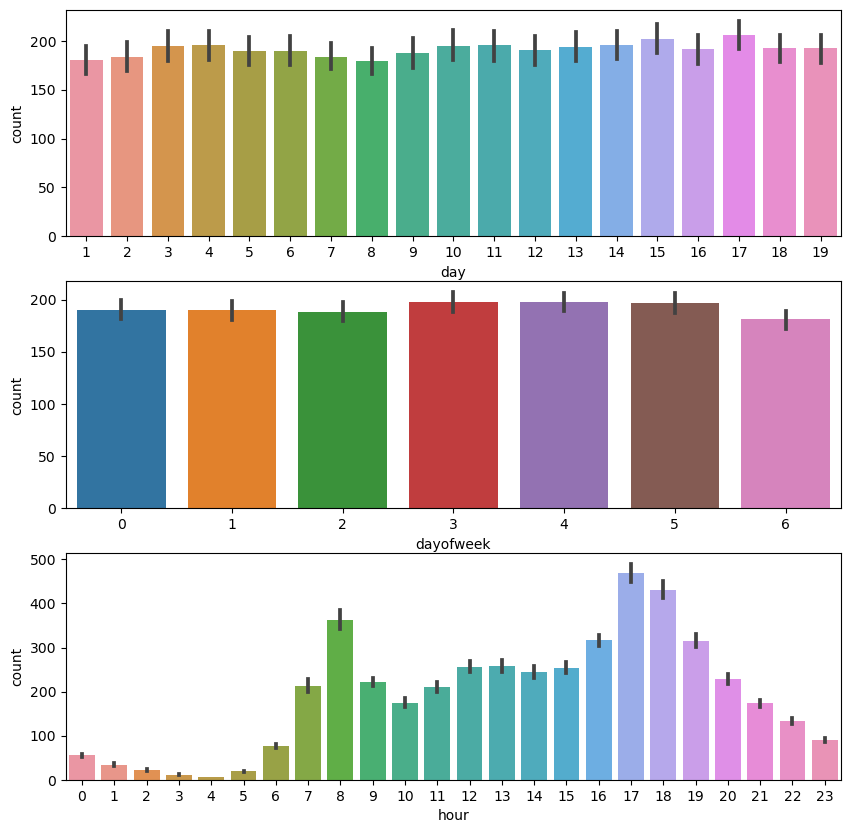

In [75]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, figsize = (10, 10))

sns.barplot(data = train, x = 'day', y = 'count', ax = ax1)
sns.barplot(data = train, x = 'dayofweek', y = 'count', ax = ax2)
sns.barplot(data = train, x = 'hour', y = 'count', ax = ax3)
plt.show()

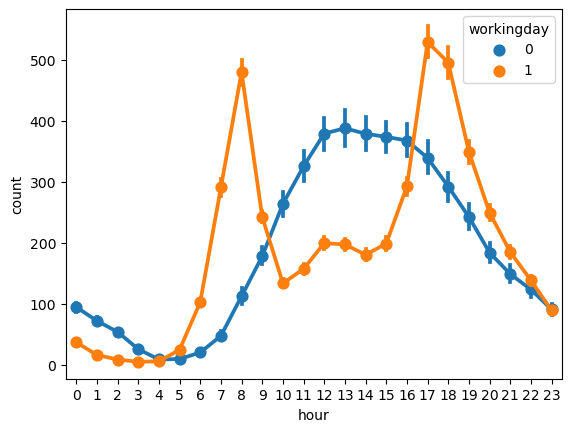

In [76]:
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'workingday', figsize = (40,10))
plt.show()

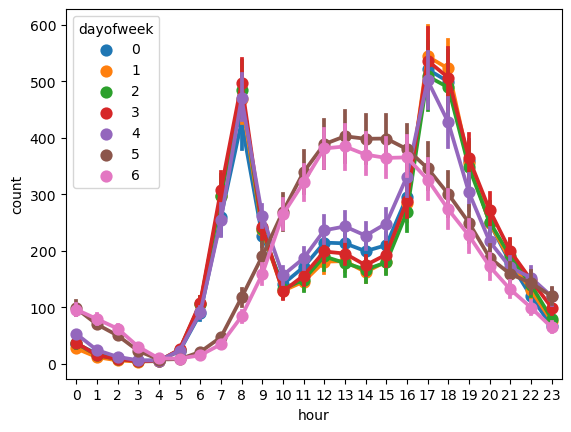

In [77]:
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'dayofweek', figsize = (40,10))

plt.show()

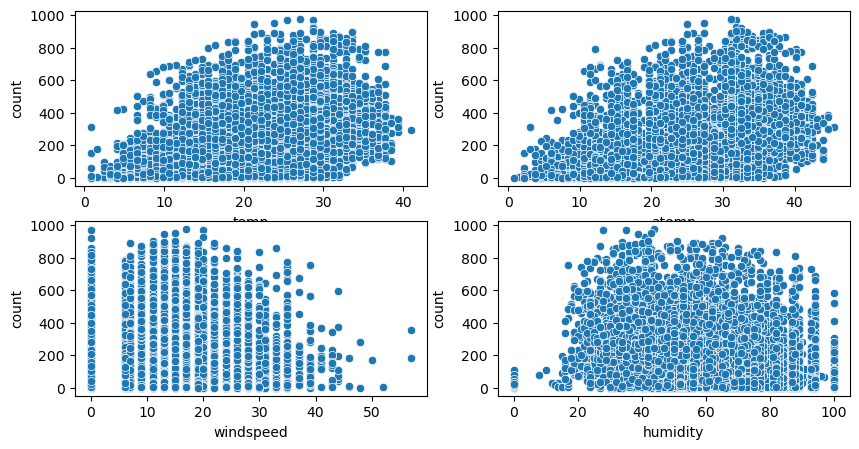

In [78]:
#연속형 변수(temp, atemp, windspeed, humidity) 에 대하여 scatter plot

fig, axs = plt.subplots(ncols = 2, nrows = 2, figsize = (10, 5))

sns.scatterplot(data = train, x = 'temp', y = 'count', ax = axs[0][0])
sns.scatterplot(data = train, x = 'atemp', y = 'count', ax = axs[0][1])
sns.scatterplot(data = train, x = 'windspeed', y = 'count', ax = axs[1][0])
sns.scatterplot(data = train, x = 'humidity', y = 'count', ax = axs[1][1])
plt.show()

In [79]:
from sklearn.ensemble import RandomForestClassifier

def predict_windzero(data):
    #데이터 가져오기
    wind0 = data.loc[data['windspeed'] == 0]
    windnot0 = data.loc[data['windspeed'] != 0]


    features = ['temp', 'atemp', 'humidity', 'month', 'hour', 'weather', 'day'] #훈련에 사용할 특성 
    windnot0['windspeed'] = windnot0['windspeed'].astype('str') #훈련을 위해서 형변환

    rf = RandomForestClassifier()
    rf.fit(windnot0[features], windnot0['windspeed'])
    predict_val = rf.predict(X=wind0[features])

    predict_wind0 = wind0
    predict_windnot0 = windnot0 

    predict_wind0['windspeed'] = predict_val
    data = predict_windnot0.append(predict_wind0)

    #데이터 정리
    data['windspeed'] = data['windspeed'].astype('float')
    data.reset_index(inplace = True)
    data.drop('index', inplace = True, axis = 1)

    return data 

In [80]:
train = predict_windspeed(train)

C:\Users\Nayoung\AppData\Local\Temp\ipykernel_8616\3258800261.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  windnotzero['windspeed'] = windnotzero['windspeed'].astype('str') #학습을 위해서 형변환
C:\Users\Nayoung\AppData\Local\Temp\ipykernel_8616\3258800261.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictwindzero['windspeed'] = predict_val
C:\Users\Nayoung\AppData\Local\Temp\ipykernel_8616\3258800261.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fu

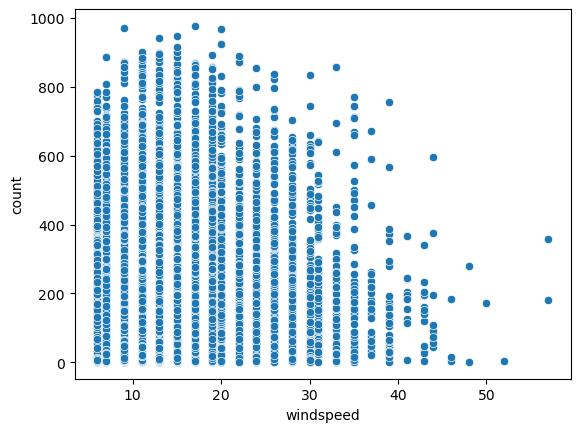

In [81]:
sns.scatterplot(data = train, x = 'windspeed', y = 'count')
plt.show()

In [ ]:
min(train['windspeed'])

In [109]:
#test set도 전처리
test = predict_windspeed(test)

C:\Users\Nayoung\AppData\Local\Temp\ipykernel_8616\3258800261.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  windnotzero['windspeed'] = windnotzero['windspeed'].astype('str') #학습을 위해서 형변환
C:\Users\Nayoung\AppData\Local\Temp\ipykernel_8616\3258800261.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictwindzero['windspeed'] = predict_val
C:\Users\Nayoung\AppData\Local\Temp\ipykernel_8616\3258800261.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fu

### IQR 이용하여 처리

<AxesSubplot:xlabel='atemp'>

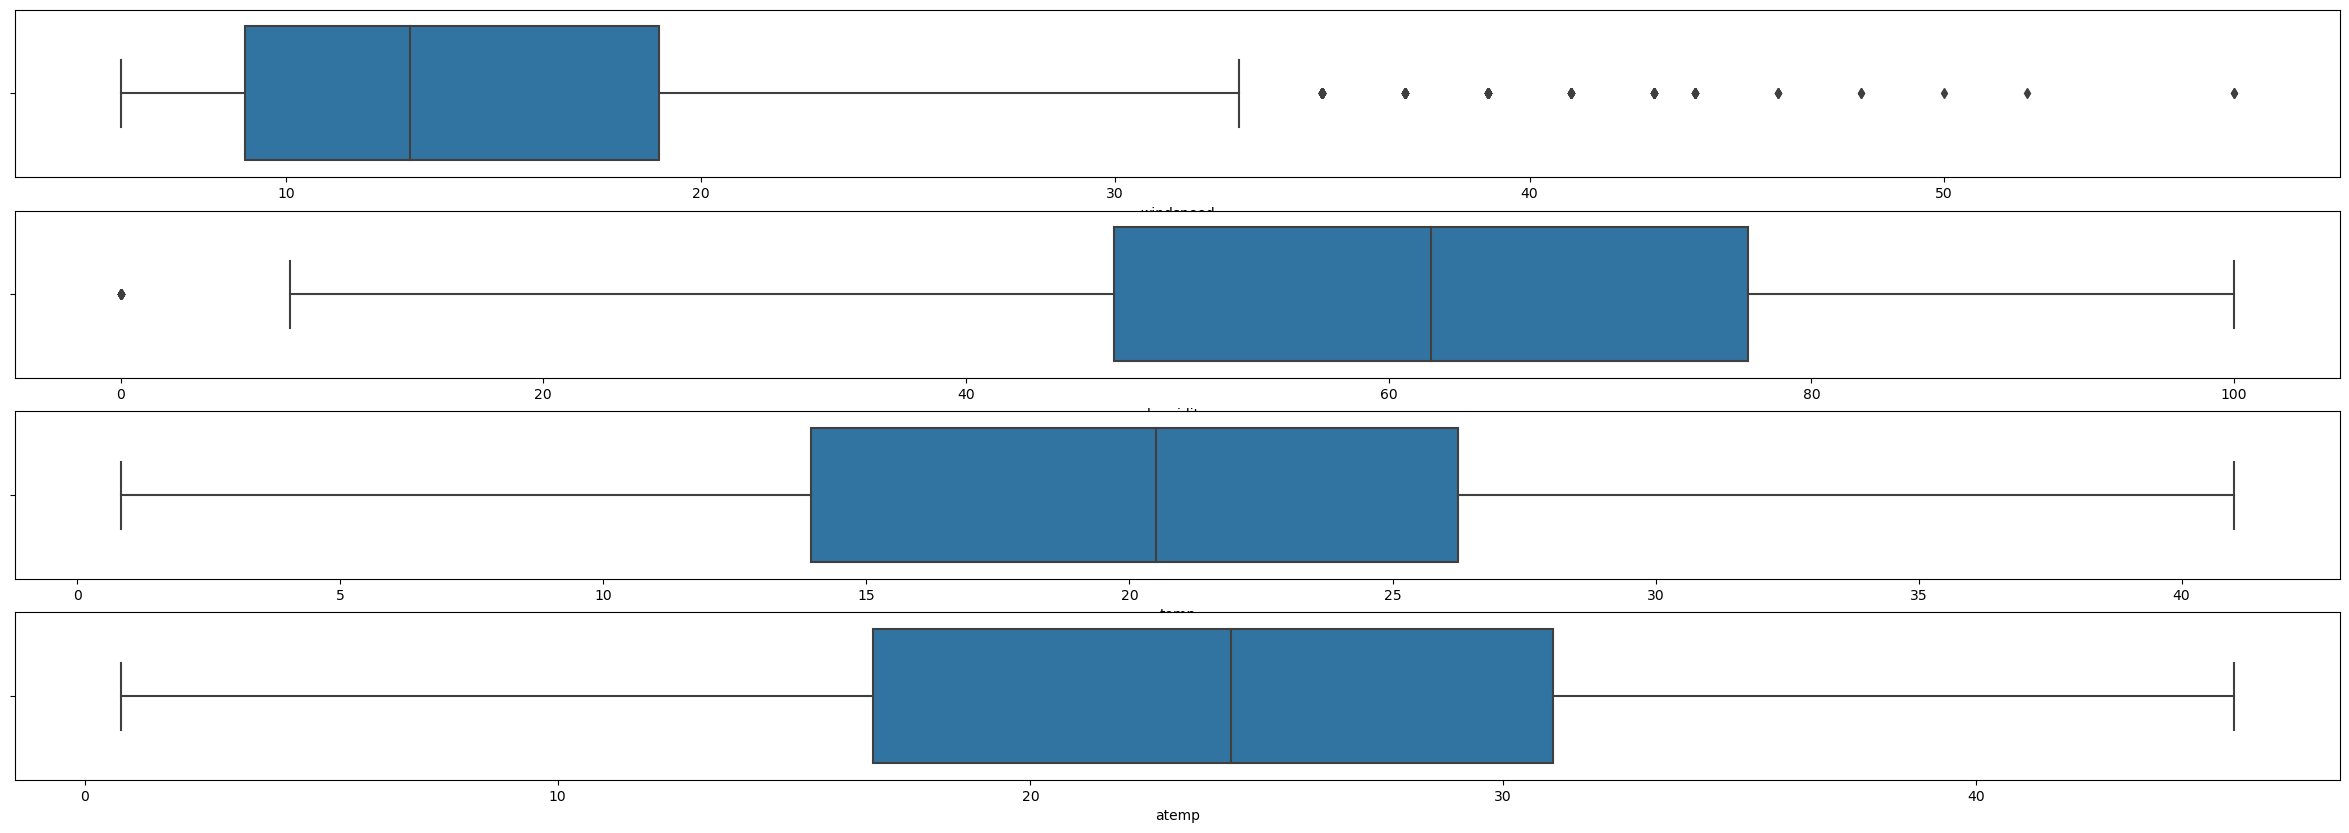

In [83]:
#windspeed, humidity, temp, atemp 
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, figsize = (30, 10))

sns.boxplot(data = train, x = 'windspeed', ax = ax1)
sns.boxplot(data = train, x = 'humidity', ax = ax2)
sns.boxplot(data = train, x = 'temp', ax = ax3)
sns.boxplot(data = train, x = 'atemp', ax = ax4)

In [84]:
from collections import Counter

def detect_outliers(data, n, features):
    outlier_indices = []
    for col in features:
        Q1 = np.percentile(data[col], 25)
        Q3 = np.percentile(data[col], 75)
        IQR = Q3 - Q1
        
        outlier_step = 1.5*IQR
        outlier_list_col = data[(data[col] < Q1-outlier_step) | (data[col] > Q3+outlier_step)].index
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)
    
    return multiple_outliers        

In [88]:
Outliers_to_drop = detect_outliers(train, 1, ['windspeed', 'humidity', 'temp', 'atemp','casual', 'registered', 'count'])
train = train.drop(Outliers_to_drop, axis = 0).reset_index(drop = True)

In [89]:
train.shape

(10585, 17)

<AxesSubplot:xlabel='humidity'>

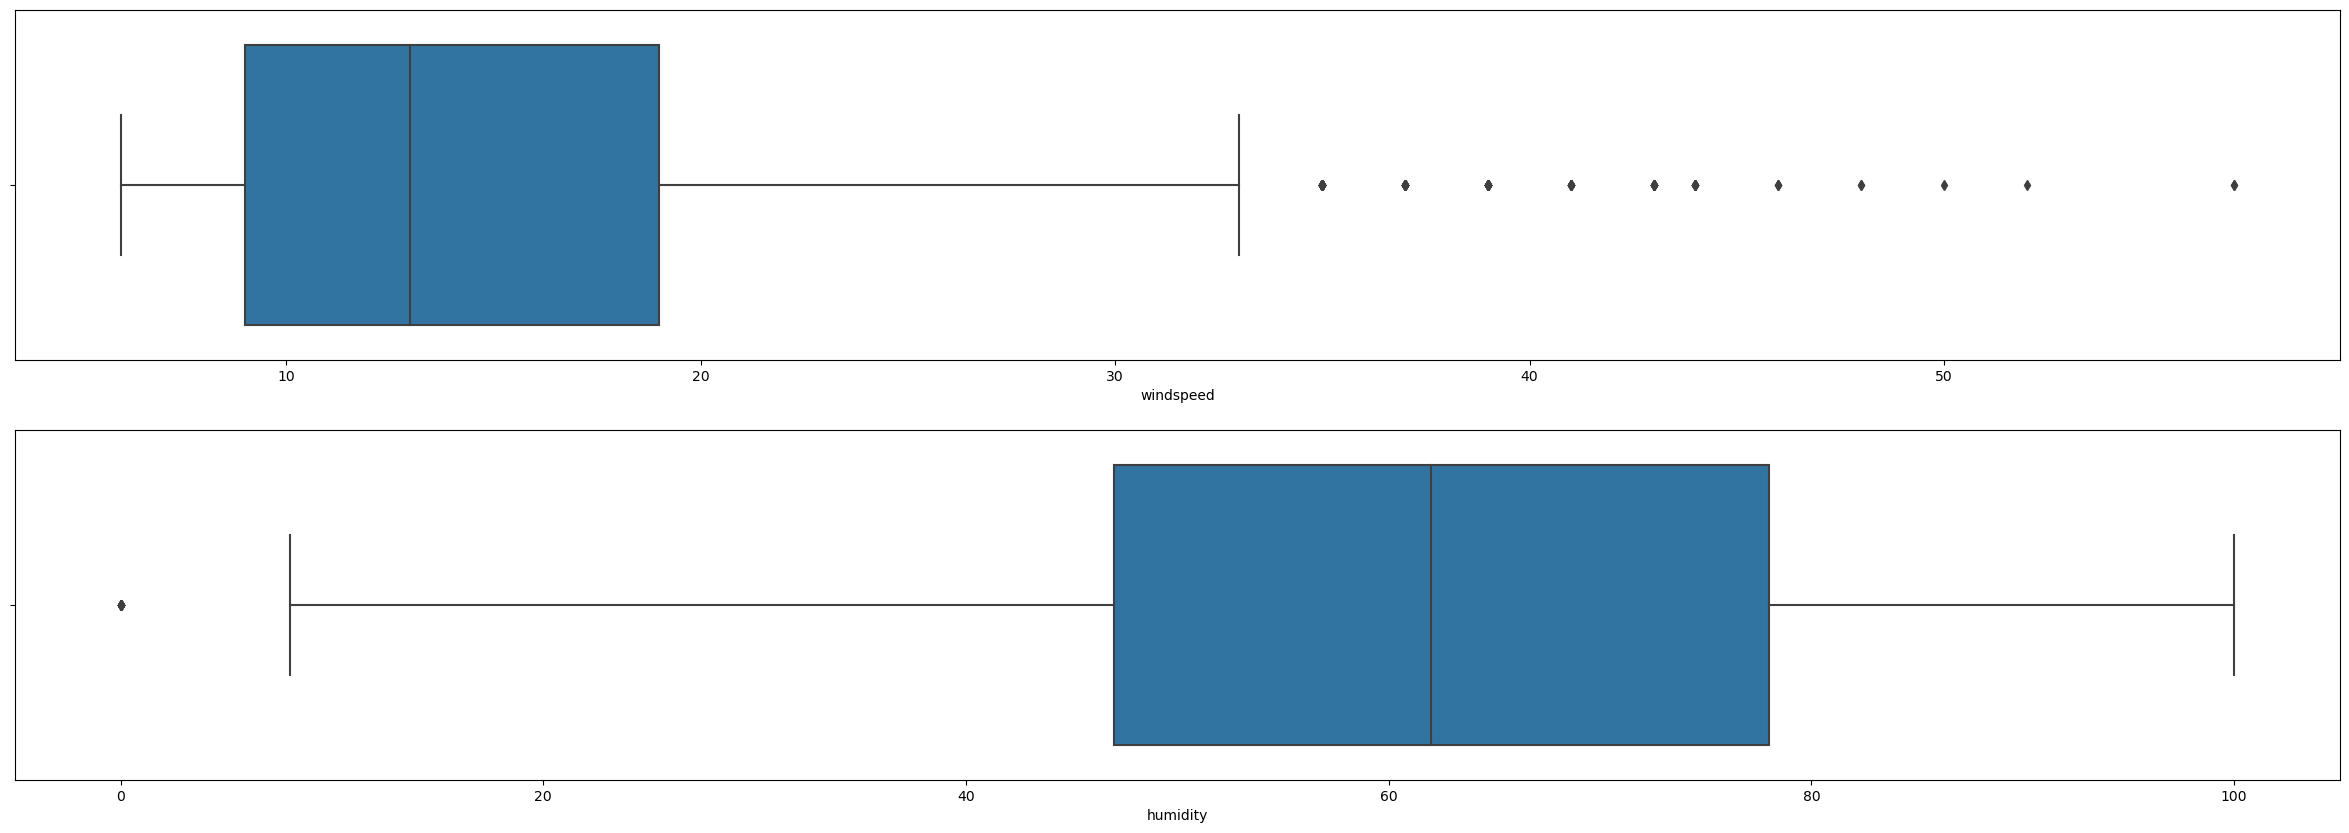

In [90]:
#windspeed, humidity, temp, atemp 
fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize = (30, 10))

sns.boxplot(data = train, x = 'windspeed', ax = ax1)
sns.boxplot(data = train, x = 'humidity', ax = ax2)

<AxesSubplot:xlabel='registered'>

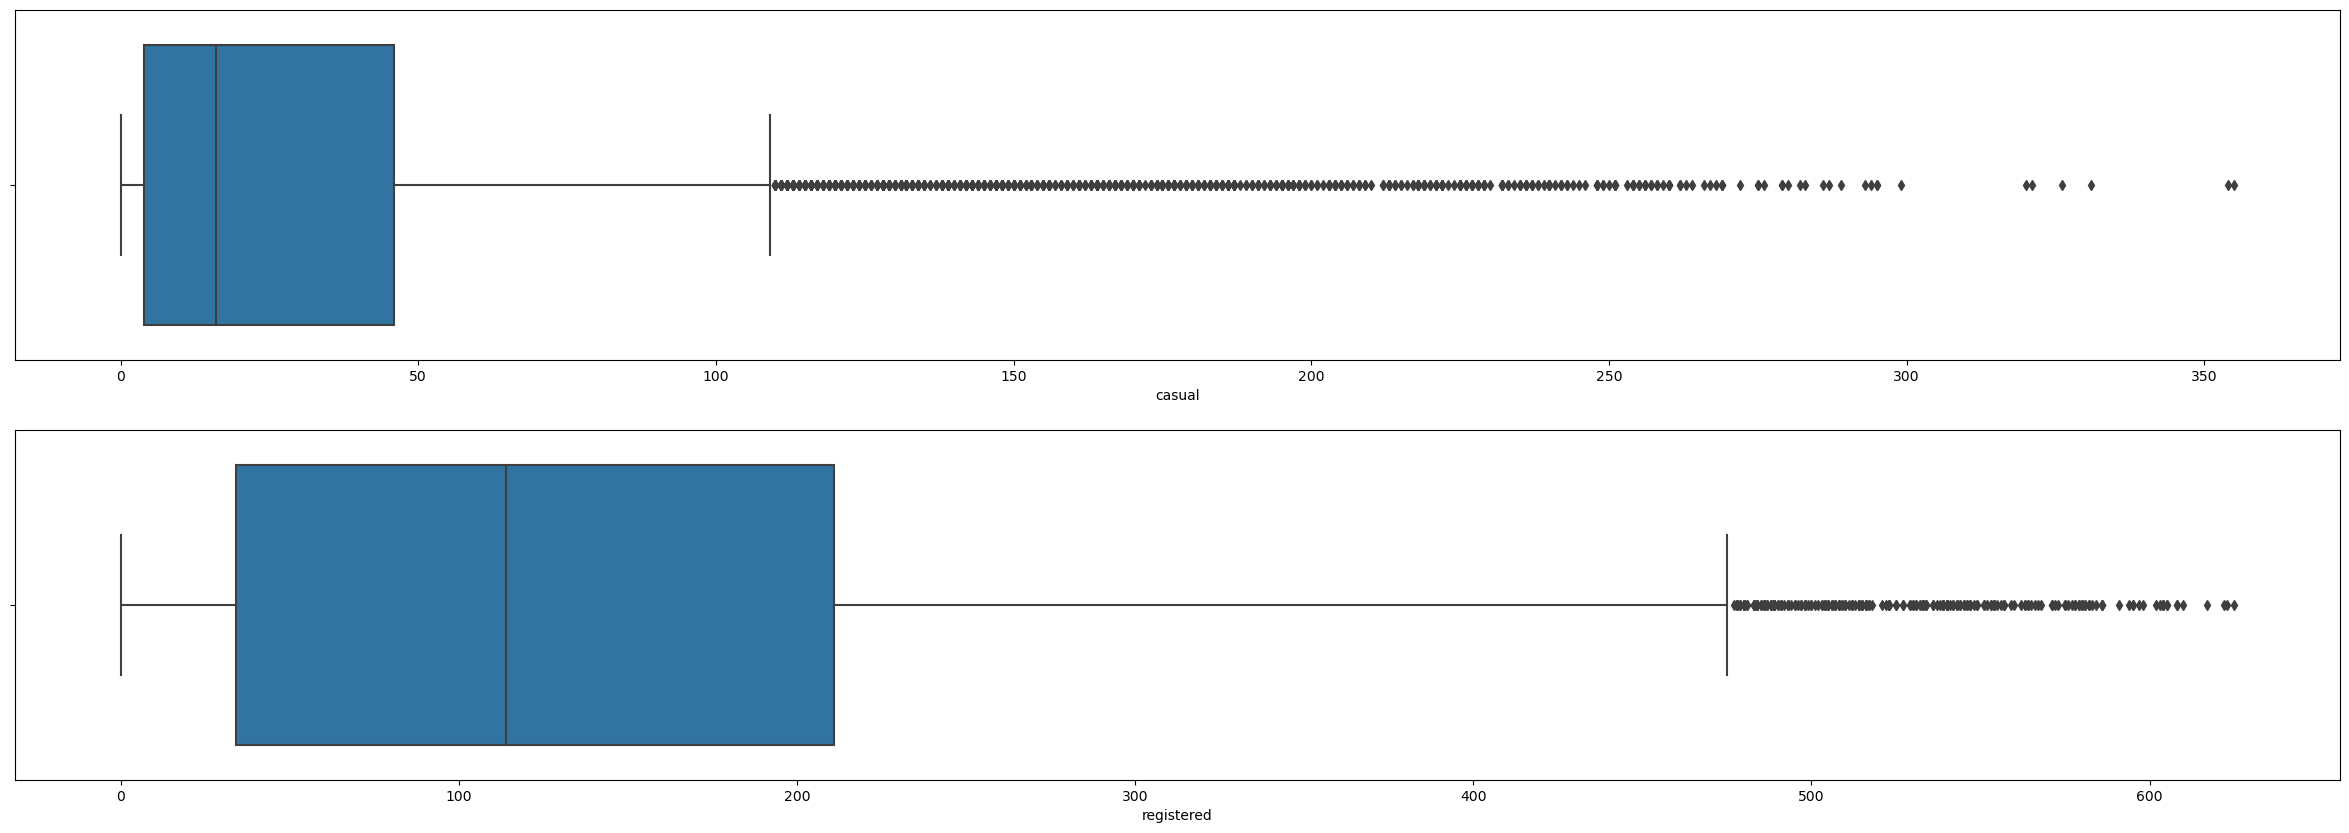

In [91]:
#windspeed, humidity, temp, atemp 
fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize = (30, 10))

sns.boxplot(data = train, x = 'casual', ax = ax1)
sns.boxplot(data = train, x = 'registered', ax = ax2)

In [93]:
train_part = train[["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"]]

for col in train_part:
    print(f"[{col}] Skewness: {train_part[col].skew():.2f}, Kurtosis: {train_part[col].kurt():.2f}")

[temp] Skewness: 0.03, Kurtosis: -0.91
[atemp] Skewness: -0.08, Kurtosis: -0.85
[casual] Skewness: 2.43, Kurtosis: 6.94
[registered] Skewness: 1.09, Kurtosis: 0.82
[humidity] Skewness: -0.10, Kurtosis: -0.75
[windspeed] Skewness: 1.14, Kurtosis: 1.50
[count] Skewness: 0.92, Kurtosis: 0.06


In [94]:
#현재 예측해야 하는 count 값에 집중, log scaling 이용해서 정규화
train['count_log'] = train['count'].map(lambda i: np.log(i) if i> 0 else 0)

C:\Users\Nayoung\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


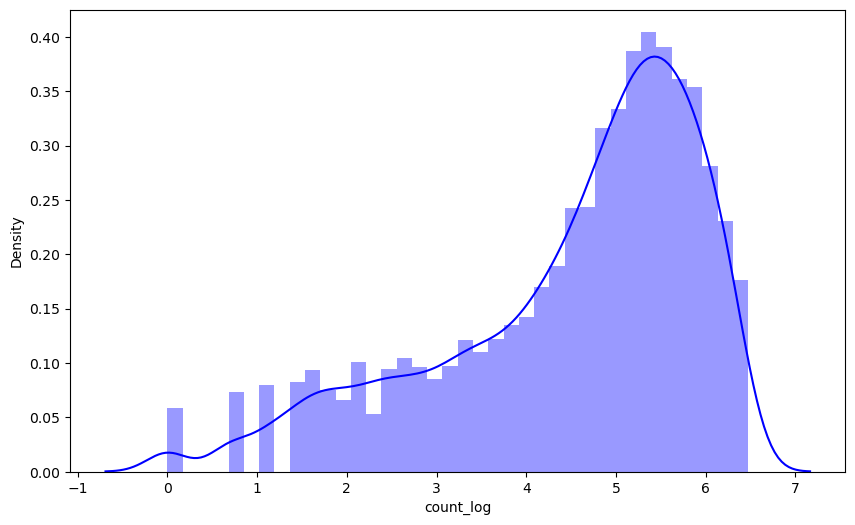

In [95]:
f, ax = plt.subplots(1, 1, figsize = (10, 6))
sns.distplot(train['count_log'], color = "b", ax = ax)
plt.show()

### 범주형 특징 one-hot encoding

In [96]:
train = pd.get_dummies(train, columns = ["weather"], prefix = "weather")
train = pd.get_dummies(train, columns = ["season"], prefix = "season")

In [110]:
test = pd.get_dummies(test, columns = ["weather"], prefix = "weather")
test = pd.get_dummies(test, columns = ["season"], prefix = "season")

### 학습을 해보자
feature 선택
- season
- year
- month 
- day
- dayofweek
- hour
- workingday
- temp
- weather
- windspeed
- humidity 

In [99]:
train.columns

Index(['datetime', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count', 'year', 'month', 'day',
       'hour', 'dayofweek', 'count_log', 'weather_1', 'weather_2', 'weather_3',
       'weather_4', 'season_1', 'season_2', 'season_3', 'season_4'],
      dtype='object')

In [100]:
#학습에 사용할 train 데이터 셋 정리 
train.drop(["datetime", "count", "casual","holiday", "registered"], axis = 1, inplace = True)

### Gradient Boosting

In [101]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

x_train = train.drop('count_log', axis = 1).values
target_label = train['count_log'].values

x_train, x_val, y_train, y_val = train_test_split(x_train, target_label, test_size = 0.2, random_state = 2000)

In [103]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor(n_estimators = 2000, learning_rate = 0.05, max_depth = 4, min_samples_leaf = 10, min_samples_split = 8, random_state = 42)
regressor.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=4, min_samples_leaf=10,
                          min_samples_split=8, n_estimators=2000,
                          random_state=42)

In [104]:
score_train = regressor.score(x_train, y_train)
score_val = regressor.score(x_val, y_val)

print(f"train score: {score_train}")
print(f"validation score: {score_val}")

train score: 0.9783894393416173
validation score: 0.9534283826521519


In [111]:
#submission 형태: datetime, count 이므로 따로 저장함 
datetime_test = test['datetime']

#예측에 사용할 특징만 남김
test.drop(["datetime", "holiday"], axis = 1, inplace = True)

x_test = test.values #array 형태로 
print(x_test)

[[ 1.    10.66  11.365 ...  0.     0.     0.   ]
 [ 1.    10.66  12.88  ...  0.     0.     0.   ]
 [ 1.    10.66  12.88  ...  0.     0.     0.   ]
 ...
 [ 0.     9.84  12.12  ...  0.     0.     0.   ]
 [ 0.    10.66  12.12  ...  0.     0.     0.   ]
 [ 0.    13.94  18.18  ...  0.     0.     0.   ]]


In [112]:
pred = regressor.predict(x_test)

In [113]:
submission = pd.DataFrame()
submission['datetime'] = datetime_test
submission['count_log'] = pred

In [114]:
submission['count'] = np.exp(submission['count_log']) #다시 원래 값으로!
    
submission.drop('count_log', axis = 1, inplace = True)
submission.head()

,datetime,count
0,2011-01-20 00:00:00,11.832185
1,2011-01-20 03:00:00,1.748165
2,2011-01-20 04:00:00,1.487724
3,2011-01-20 05:00:00,5.454661
4,2011-01-20 06:00:00,26.646894


In [115]:
submission.to_csv("Bike.csv", index = False) #score = 0.43009